In [1]:
import timeit
from matplotlib import pyplot as plt
import seaborn as sns
import random
from utils import generar_objetos

from empaquetar_aprox import empaquetar_aprox
from empaquetar_bt import empaquetar_bt

random.seed(42)

sns.set(rc={'figure.facecolor':'white'})

In [2]:
def get_time(empaquetar, objetos):
    number_of_executions, total_time = timeit.Timer(lambda: empaquetar(objetos)).autorange()
    return total_time / number_of_executions


def plot(empaquetar, label, cases):
    time_to_run = [get_time(empaquetar, case) for case in cases]
    plt.plot([i for i in range(len(cases))], time_to_run, label=label)
    return plt


def plot_comparison(cases, title, xlabel):
    plot(empaquetar_bt, 'Backtracking', cases)
    plot(empaquetar_aprox, 'Algoritmo aproximado', cases)
    plt.xlabel(xlabel)
    plt.ylabel("Tiempo de ejecucion (s)")
    plt.title(title)
    plt.legend()
    plt.show()

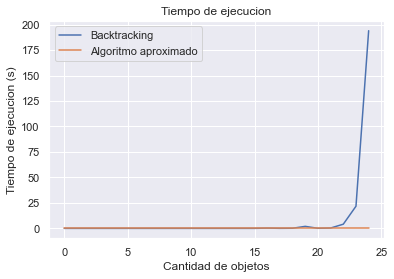

In [3]:
cases_k_constant = [generar_objetos(i) for i in range(25)]
plot_comparison(cases_k_constant, "Tiempo de ejecucion" ,"Cantidad de objetos")